In [22]:
#req packages
import numpy as np 
import pandas as pd 
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt 

In [23]:
# def function
# a = slip angle

def pacejka(a, B, C, D, E):
    return D * np.sin(C * np.arctan(B * a - E * (B * a - np.arctan(B * a))))

In [24]:
run05 = pd.read_csv("data/run_05.csv")
run05['TTC'] = (run05['RF Tire Temp 08']+run05['RF Tire Temp 09'])/2
run05['FX']=run05['RF X Force']*4.44822
run05['FY']=run05['RF Y Force']*4.44822
run05['FZ']=run05['RF Y Force']*4.44822
run05 = run05[run05['Time']>341]
run05 = run05[run05['Front_Slip_angle']> -180]
run05 = run05[run05['Front_Slip_angle']< 180]


In [25]:
data = pd.DataFrame()
data['Time']=run05['Time'].copy()
data['FX'] = run05['FX'].copy()
data['FY'] = run05['FY'].copy()
data['FZ'] = run05['FZ'].copy()
data['TTI'] = run05['RF Tire Temp 02'].copy()
data['TTC'] = run05['TTC'].copy()
data['TTO'] = run05['RF Tire Temp 15'].copy()
data['SA'] = run05['Front_Slip_angle'].copy()
data['IA'] = 0
data['AMBTMP'] = 12.2222
data['P'] = 82.7371

In [26]:
#optimize
def fit_pacejka(a, Fy):
    initial_guess = [0.33, 0.93, 50, 0.29]  # initial guess for B, C, D, and E
    popt, _ = curve_fit(pacejka, a, Fy, p0=initial_guess, maxfev= 100000)
    return popt

In [27]:
a = data['SA'].values
Fy = data['FY'].values * (-1)

In [28]:
# fit fy 
popty = fit_pacejka(a, Fy)

Text(0, 0.5, 'Fy')

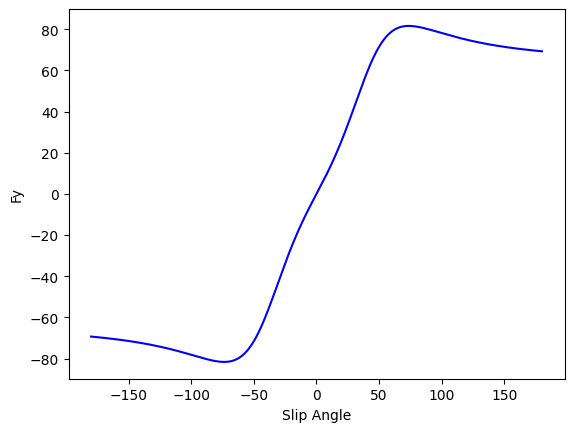

In [29]:
a_fit = np.linspace(min(a), max(a), num=200)
Fy_fit = pacejka(a_fit, *popty)
plt.plot(a_fit, Fy_fit, color = 'blue')
plt.xlabel('Slip Angle')
plt.ylabel('Fy')
#plt.xticks(color='w')
#plt.yticks(color='w')


In [30]:
run07 = pd.read_csv("data/run_07.csv")
run07['TTC'] = (run07['RF Tire Temp 08']+run07['RF Tire Temp 09'])/2
run07['FX']=run07['RF X Force']*4.44822
run07['FY']=run07['RF Y Force']*4.44822
run07['FZ']=run07['RF Y Force']*4.44822
run07 = run07[run07['Time']>308]
run07 = run07[run07['Front_Slip_angle']> -180]
run07 = run07[run07['Front_Slip_angle']< 180]

In [31]:
data1 = pd.DataFrame()
data1['Time']=run07['Time'].copy()
data1['FX'] = run07['FX'].copy()
data1['FY'] = run07['FY'].copy()
data1['FZ'] = run07['FZ'].copy()
data1['TTI'] = run07['RF Tire Temp 02'].copy()
data1['TTC'] = run07['TTC'].copy()
data1['TTO'] = run07['RF Tire Temp 15'].copy()
data1['SA'] = run07['Front_Slip_angle'].copy()
data1['IA'] = 0
data1['AMBTMP'] = 12.7778
data1['P'] = 96.5266

In [32]:
a1 = data1['SA'].values
Fy1 = data1['FY'].values * (-1)


In [33]:
popt1 = fit_pacejka(a1, Fy1)

Text(0, 0.5, 'Fy')

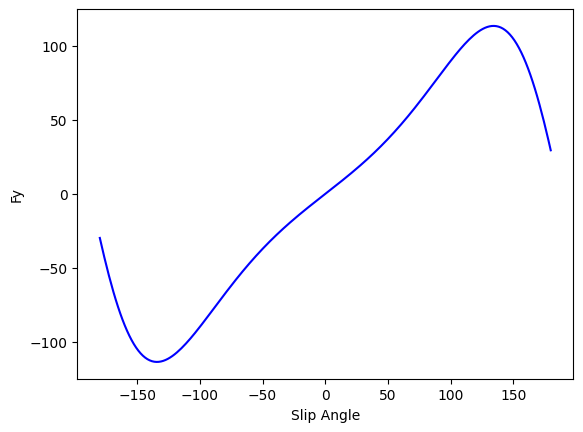

In [34]:
a_fit1 = np.linspace(min(a1), max(a1), num=200)
Fy_fit1 = pacejka(a_fit1, *popt1)
plt.plot(a_fit1, Fy_fit1, color = 'blue')
plt.xlabel('Slip Angle')
plt.ylabel('Fy')
#plt.xticks(color='w')
#plt.yticks(color='w')